In [111]:
!pip install xenaPython

In [112]:
import pandas as pd
# Load the datasets
mutations = pd.read_csv('/Users/Joro/Downloads/TCGA-BRCA.mutect2_snv.tsv', sep='\t')
survival = pd.read_csv('/Users/Joro/Downloads/TCGA-BRCA.survival.tsv', sep='\t')

In [85]:
!pip install lifelines

In [113]:
print(mutations.head())
print(survival.head())

          Sample_ID    gene chrom      start        end ref alt  \
0  TCGA-D8-A1XY-01A   USP24  chr1   55159655   55159655   T   C   
1  TCGA-D8-A1XY-01A  ERICH3  chr1   74571494   74571494   C   T   
2  TCGA-D8-A1XY-01A  KIF26B  chr1  245419680  245419680   G   T   
3  TCGA-D8-A1XY-01A   USP34  chr2   61189055   61189055   G   C   
4  TCGA-D8-A1XY-01A  ANTXR1  chr2   69245305   69245305   G   A   

  Amino_Acid_Change              effect            filter   dna_vaf  
0           p.I342V    missense_variant  panel_of_normals  0.402439  
1          p.E1406K    missense_variant              PASS  0.511628  
2           p.S367S  synonymous_variant              PASS  0.658824  
3          p.L3296L  synonymous_variant              PASS  0.234899  
4           p.S505S  synonymous_variant              PASS  0.239583  
             sample  OS      _PATIENT  OS.time
0  TCGA-C8-A275-01A   0  TCGA-C8-A275        1
1  TCGA-BH-A1F8-11B   1  TCGA-BH-A1F8        1
2  TCGA-BH-A1F8-01A   1  TCGA-BH-A1F

In [114]:
survival.rename(columns={
    'sample': 'Sample_ID', 
}, inplace=True)

In [115]:
# Merge the DataFrames on the common identifier, assuming 'Sample_ID'
merged_data = pd.merge(mutations, survival, on='Sample_ID')

# Save the merged DataFrame to a new TSV file
merged_data.to_csv('Merged_TCGA-BRCA_Data.tsv', sep='\t', index=False)

In [116]:
print(merged_data.head())

          Sample_ID    gene chrom      start        end ref alt  \
0  TCGA-D8-A1XY-01A   USP24  chr1   55159655   55159655   T   C   
1  TCGA-D8-A1XY-01A  ERICH3  chr1   74571494   74571494   C   T   
2  TCGA-D8-A1XY-01A  KIF26B  chr1  245419680  245419680   G   T   
3  TCGA-D8-A1XY-01A   USP34  chr2   61189055   61189055   G   C   
4  TCGA-D8-A1XY-01A  ANTXR1  chr2   69245305   69245305   G   A   

  Amino_Acid_Change              effect            filter   dna_vaf  OS  \
0           p.I342V    missense_variant  panel_of_normals  0.402439   0   
1          p.E1406K    missense_variant              PASS  0.511628   0   
2           p.S367S  synonymous_variant              PASS  0.658824   0   
3          p.L3296L  synonymous_variant              PASS  0.234899   0   
4           p.S505S  synonymous_variant              PASS  0.239583   0   

       _PATIENT  OS.time  
0  TCGA-D8-A1XY      503  
1  TCGA-D8-A1XY      503  
2  TCGA-D8-A1XY      503  
3  TCGA-D8-A1XY      503  
4  TCGA-D8-

In [117]:
merged_data_cleaned = merged_data.dropna()

for column in merged_data.columns:
    if merged_data[column].dtype == 'float64' or merged_data[column].dtype == 'int64':
        merged_data[column].fillna(merged_data[column].median(), inplace=True)

# Check for missing data
print(merged_data.isnull().sum())

Sample_ID                0
gene                     0
chrom                    0
start                    0
end                      0
ref                      0
alt                      0
Amino_Acid_Change    20370
effect                   0
filter                   0
dna_vaf                  0
OS                       0
_PATIENT                 0
OS.time                  0
dtype: int64


In [118]:
merged_data_cleaned = merged_data.drop_duplicates()

In [119]:
# Filter out benign mutations if necessary
merged_data_cleaned = merged_data[merged_data['effect'] != 'benign']

In [120]:
print(merged_data_cleaned.describe())

              start           end        dna_vaf             OS        OS.time
count  1.099800e+05  1.099800e+05  109980.000000  109980.000000  109980.000000
mean   7.935489e+07  7.935489e+07       0.240205       0.111429    1134.320940
std    5.802624e+07  5.802624e+07       0.154006       0.314665    1189.039535
min    1.279900e+04  1.279900e+04       0.000000       0.000000       1.000000
25%    3.374541e+07  3.374541e+07       0.124352       0.000000     385.000000
50%    6.493016e+07  6.493016e+07       0.205607       0.000000     675.000000
75%    1.186858e+08  1.186858e+08       0.322581       0.000000    1569.000000
max    2.489183e+08  2.489183e+08       1.000000       1.000000    8605.000000


In [121]:
# Convert categorical variable 'effect' to numeric codes
merged_data_cleaned['effect_code'] = merged_data_cleaned['effect'].astype('category').cat.codes

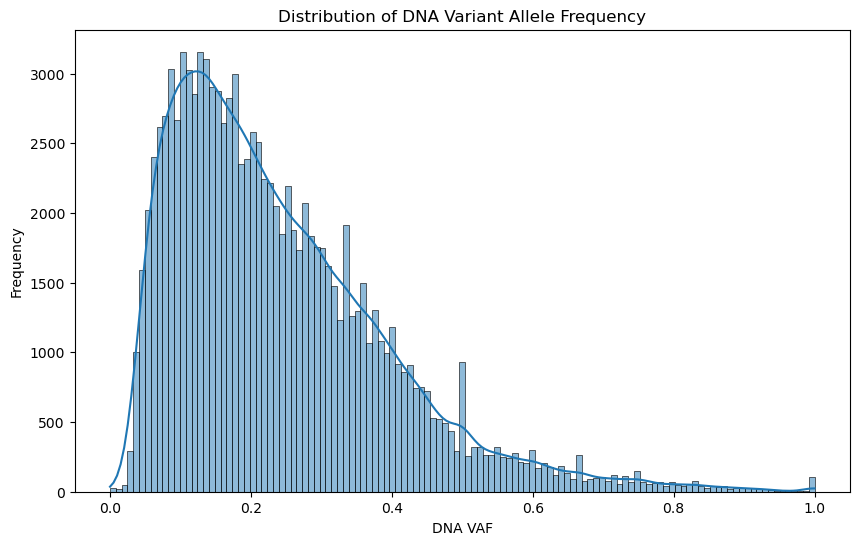

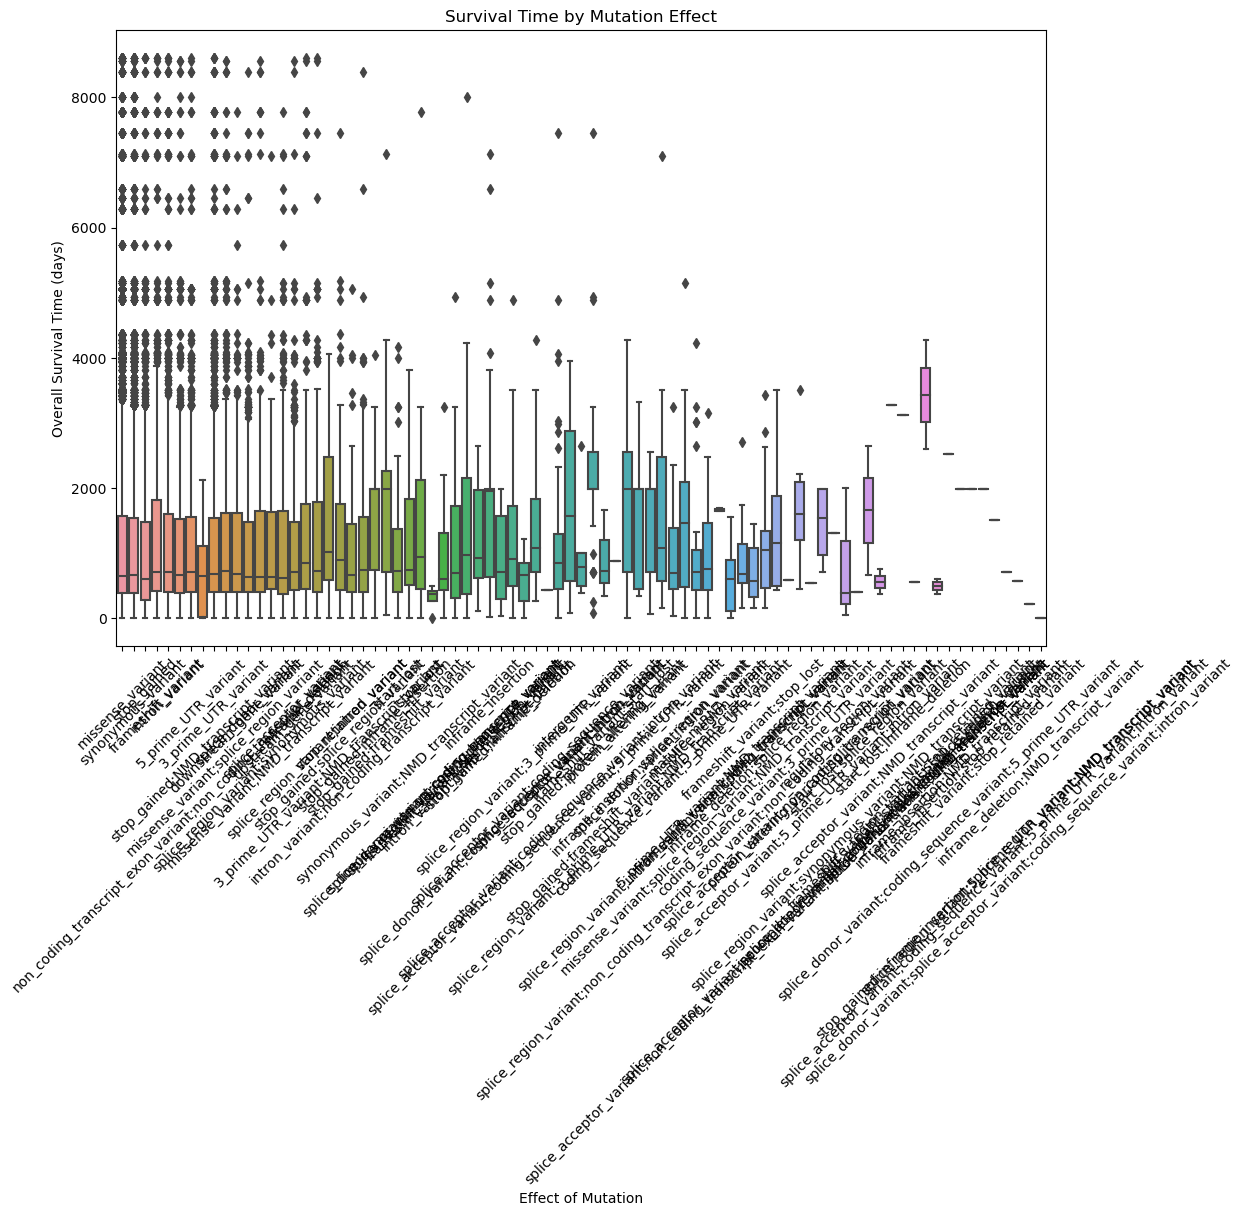

In [123]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of DNA Variant Allele Frequency (VAF)
plt.figure(figsize=(10, 6))
sns.histplot(merged_data_cleaned['dna_vaf'], kde=True)
plt.title('Distribution of DNA Variant Allele Frequency')
plt.xlabel('DNA VAF')
plt.ylabel('Frequency')
plt.show()

# Boxplot for Overall Survival time grouped by gene mutation effect
plt.figure(figsize=(12, 8))
sns.boxplot(x='effect', y='OS.time', data=merged_data_cleaned)
plt.title('Survival Time by Mutation Effect')
plt.xlabel('Effect of Mutation')
plt.ylabel('Overall Survival Time (days)')
plt.xticks(rotation=45)
plt.show()


In [96]:
print(merged_data.shape) 

(109980, 14)


In [97]:
num_genes = len(genes_selected)
print("Number of genes selected:", num_genes)

Number of genes selected: 18496


In [98]:
dim = int(np.sqrt(num_genes))
print("Dimension to reshape into:", dim, "x", dim)

# Check if dim*dim equals num_genes
if dim * dim != num_genes:
    print("Mismatch:", dim * dim, "does not equal", num_genes)


Dimension to reshape into: 136 x 136


In [99]:
# Find the largest perfect square less than or equal to num_genes
import math
max_square = int(math.sqrt(num_genes)) ** 2
print("Using", max_square, "features, which is the largest perfect square <= num_genes.")

genes_selected = pivot_table.columns[:max_square]
X = pivot_table[genes_selected].values

# Normalize and reshape
X_normalized = scaler.fit_transform(X)
dim = int(math.sqrt(max_square))
X_reshaped = X_normalized.reshape(-1, dim, dim, 1)


Using 18496 features, which is the largest perfect square <= num_genes.


In [100]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(dim, dim, 1)))


In [101]:
print("Shape of X_normalized:", X_normalized.shape)
print("Expected reshaped dimensions:", (-1, dim, dim, 1))


Shape of X_normalized: (986, 18496)
Expected reshaped dimensions: (-1, 136, 136, 1)


In [102]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from keras.utils import to_categorical

# Aggregating dna_vaf by Sample_ID and gene
pivot_table = merged_data.pivot_table(index='Sample_ID', columns='gene', values='dna_vaf', fill_value=0)

# Selecting a larger set of genes based on some criterion here
genes_selected = pivot_table.columns  # adjust this based on your selection criteria
X = pivot_table[genes_selected].values

# Normalize the data
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Reshape data based on the number of selected genes
num_genes = len(genes_selected)
dim = int(np.sqrt(num_genes)) 
X_reshaped = X_normalized.reshape(-1, dim, dim, 1)

# Prepare labels
y = data[['Sample_ID', 'OS']].drop_duplicates().set_index('Sample_ID')['OS']
y_encoded = to_categorical(y) 

ValueError: cannot reshape array of size 18015210 into shape (136,136,1)

In [103]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(136, 136, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid')) 

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary to check the depth and number of parameters
model.summary()


Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 134, 134, 32)      320       
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 67, 67, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_19 (Conv2D)          (None, 65, 65, 64)        18496     
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 32, 32, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_20 (Conv2D)          (None, 30, 30, 128)       73856     
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 15, 15, 128)     

In [106]:
import pandas as pd
from lifelines import CoxPHFitter

# Prepare a DataFrame for Cox model, converting VAFs to a more manageable format if not already done
df_cox = merged_data_cleaned[['Sample_ID', 'dna_vaf', 'OS', 'OS.time']].copy()

df_cox_pivot = df_cox.pivot(index='Sample_ID', columns='gene', values='dna_vaf').fillna(0)

df_cox_pivot = df_cox_pivot.join(merged_data_cleaned.set_index('Sample_ID')[['OS.time', 'OS']].drop_duplicates())

# Fit the Cox Proportional Hazards model
cph = CoxPHFitter()
cph.fit(df_cox_pivot, duration_col='OS.time', event_col='OS')
cph.print_summary()

KeyError: 'gene'

In [107]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit logistic regression with L1 penalty
model = LogisticRegression(penalty='l1', solver='liblinear', random_state=42)
model.fit(X_train_scaled, y_train)

# Check coefficients
importances = pd.DataFrame(data={
    'Gene': genes_selected,
    'Importance': model.coef_[0]
})
importances = importances.sort_values(by='Importance', key=abs, ascending=False)  
print(importances.head(20))


             Gene  Importance
15422  ST6GALNAC3    0.723243
12807      R3HDML    0.600900
309           ADA    0.450616
16576        TOM1    0.439789
15679     SYNPO2L    0.433539
10109        NCF4    0.427211
13933      SAMD10    0.426732
17236       UBXN6    0.413768
5667        FMNL3    0.395209
15449       STAP1    0.378791
11278       PACS2    0.377439
15483       STIM1    0.374968
15774       TAPBP    0.364577
6326        GPHA2    0.363444
161    AC092071.1    0.360435
10077      NBPF14    0.350815
17541       VSIG1    0.346044
12947    RAP1GDS1    0.344751
16345     TMEM190    0.340873
14183      SEPT14    0.337148


In [109]:
top_genes = importances.head(50)['Gene'].tolist()
print("Top genes identified to be most relevant:", top_genes)

Top genes identified to be most relevant: ['ST6GALNAC3', 'R3HDML', 'ADA', 'TOM1', 'SYNPO2L', 'NCF4', 'SAMD10', 'UBXN6', 'FMNL3', 'STAP1', 'PACS2', 'STIM1', 'TAPBP', 'GPHA2', 'AC092071.1', 'NBPF14', 'VSIG1', 'RAP1GDS1', 'TMEM190', 'SEPT14', 'CX3CL1', 'LCE1B', 'KRT71', 'LRRC70', 'ZNF789', 'MOGS', 'FOXO1', 'KCNN1', 'PPP3CB', 'ATP2B1', 'TIMP3', 'CYTH2', 'RSPH10B', 'IQSEC3', 'OR5B21', 'ZNF311', 'CLEC4A', 'TRIM72', 'ERLEC1', 'CAMK2B', 'LNX2', 'TMPRSS11D', 'POP5', 'C16orf46', 'C4A', 'KCNK17', 'CNN2', 'RP11-280O1.2', 'APOL3', 'PIGQ']


In [110]:
from tensorflow.keras.layers import Dense, LSTM, Input, Activation, Multiply
from tensorflow.keras.models import Model

def attention_model(input_shape):
    inputs = Input(shape=input_shape)
    attention_probs = Dense(input_shape[1], activation='softmax', name='attention_vec')(inputs)
    attention_mul = Multiply()([inputs, attention_probs])
    attention_mul = LSTM(32)(attention_mul)
    output = Dense(1, activation='sigmoid')(attention_mul)
    model = Model(inputs=[inputs], outputs=output)
    return model

model = attention_model((X_train.shape[1], 1))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 18630, 1)]           0         []                            
                                                                                                  
 attention_vec (Dense)       (None, 18630, 1)             2         ['input_1[0][0]']             
                                                                                                  
 multiply (Multiply)         (None, 18630, 1)             0         ['input_1[0][0]',             
                                                                     'attention_vec[0][0]']       
                                                                                                  
 lstm (LSTM)                 (None, 32)                   4352      ['multiply[0][0]']        

Feature ranking:
1. feature 15422 (0.004743)
2. feature 14183 (0.004164)
3. feature 15679 (0.003810)
4. feature 2767 (0.002936)
5. feature 625 (0.002800)
6. feature 9035 (0.002412)
7. feature 4312 (0.002348)
8. feature 5667 (0.002170)
9. feature 10109 (0.002151)
10. feature 13435 (0.002103)
11. feature 2007 (0.002082)
12. feature 15774 (0.002069)
13. feature 6884 (0.002069)
14. feature 338 (0.002069)
15. feature 44 (0.002044)
16. feature 3501 (0.001974)
17. feature 4318 (0.001920)
18. feature 13151 (0.001898)
19. feature 13851 (0.001866)
20. feature 950 (0.001838)
21. feature 10683 (0.001814)
22. feature 16576 (0.001811)
23. feature 7722 (0.001783)
24. feature 1186 (0.001758)
25. feature 18022 (0.001755)
26. feature 17668 (0.001716)
27. feature 15403 (0.001690)
28. feature 4307 (0.001684)
29. feature 17541 (0.001664)
30. feature 5308 (0.001632)
31. feature 10599 (0.001617)
32. feature 3193 (0.001609)
33. feature 309 (0.001567)
34. feature 12528 (0.001563)
35. feature 7740 (0.001561)
36

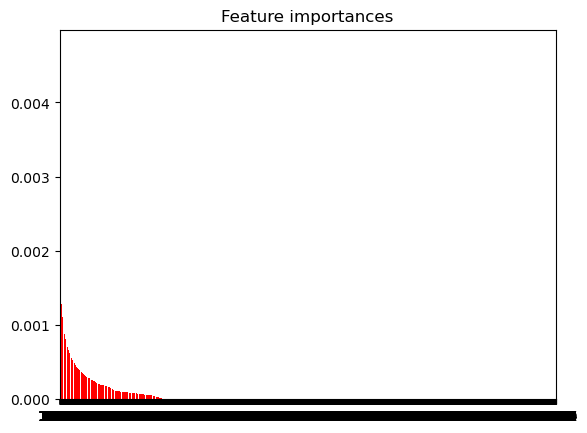

In [ ]:
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a RandomForest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Feature importance
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices], color="r", align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()

In [ ]:
important_genes = [pivot_table.columns[i] for i in [15422, 14183, 15679, 2767, 625]]
print("Important genes:", important_genes)

Important genes: ['ST6GALNAC3', 'SEPT14', 'SYNPO2L', 'CDH7', 'ALDH5A1']


In [ ]:
model.fit(X_reshaped, y, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
25/25 [==============================] - 0s 2ms/step - loss: 0.3682 - accuracy: 0.8719 - val_loss: 0.3594 - val_accuracy: 0.8608
Epoch 2/10
25/25 [==============================] - 0s 2ms/step - loss: 0.3641 - accuracy: 0.8745 - val_loss: 0.3492 - val_accuracy: 0.8763
Epoch 3/10
25/25 [==============================] - 0s 2ms/step - loss: 0.3566 - accuracy: 0.8732 - val_loss: 0.3545 - val_accuracy: 0.8763
Epoch 4/10
25/25 [==============================] - 0s 2ms/step - loss: 0.3545 - accuracy: 0.8758 - val_loss: 0.3602 - val_accuracy: 0.8660
Epoch 5/10
25/25 [==============================] - 0s 2ms/step - loss: 0.3503 - accuracy: 0.8758 - val_loss: 0.3625 - val_accuracy: 0.8660
Epoch 6/10
25/25 [==============================] - 0s 2ms/step - loss: 0.3460 - accuracy: 0.8732 - val_loss: 0.3661 - val_accuracy: 0.8763
Epoch 7/10
25/25 [==============================] - 0s 2ms/step - loss: 0.3435 - accuracy: 0.8771 - val_loss: 0.3713 - val_accuracy: 0.8711
Epoch 8/10
25/25 [==

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Prepare data
X = merged_data_cleaned.drop(columns=['Sample_ID', 'gene', 'chrom', 'ref', 'alt', 'effect', 'filter', '_PATIENT', 'Amino_Acid_Change'])
y = merged_data_cleaned['OS']

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build MLP
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

# Compile  MLP
model.compile(optimizer='adam', loss='mean_squared_error')

# Train MLP
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Evaluate MLP
loss = model.evaluate(X_test, y_test)
print('Test loss:', loss)

Epoch 1/10
2750/2750 [==============================] - 1s 373us/step - loss: 4.1517e-04
Epoch 2/10
2750/2750 [==============================] - 1s 337us/step - loss: 4.8139e-05
Epoch 3/10
2750/2750 [==============================] - 1s 337us/step - loss: 2.4159e-05
Epoch 4/10
2750/2750 [==============================] - 1s 352us/step - loss: 1.3473e-05
Epoch 5/10
2750/2750 [==============================] - 1s 339us/step - loss: 7.4032e-06
Epoch 6/10
2750/2750 [==============================] - 1s 339us/step - loss: 6.9739e-06
Epoch 7/10
2750/2750 [==============================] - 1s 339us/step - loss: 2.7555e-06
Epoch 8/10
2750/2750 [==============================] - 1s 350us/step - loss: 3.7400e-06
Epoch 9/10
2750/2750 [==============================] - 1s 343us/step - loss: 2.6041e-06
Epoch 10/10
688/688 [==============================] - 0s 245us/step - loss: 1.9432e-07
Test loss: 1.943151062278048e-07
